Integrantes do Grupo

Turma:2ESPF

* Gabriel Henrique Padula ‚Äì RA: 554907

* Gustavo Pierri ‚Äì RA: 558928

* Rodrigo Nakata ‚Äì RA: 556417

* Gabriel Ferreira ‚Äì RA: 551669

* Arthur Abonizio ‚Äì RA: 555506


## Contexto

A Dasa √© a maior rede de sa√∫de integrada do Brasil, reunindo mais de 900 unidades e 15 hospitais de alta complexidade distribu√≠dos pelo pa√≠s. Com um prop√≥sito voltado √† transforma√ß√£o da l√≥gica da sa√∫de, a organiza√ß√£o adota um modelo de cuidado integral baseado em valor. Isso significa entregar solu√ß√µes que priorizam o bem-estar do paciente, efici√™ncia dos recursos e qualidade assistencial, por meio de tecnologia, dados e inova√ß√£o na gest√£o da sa√∫de.

## Objetivo

O principal objetivo da an√°lise √© identificar padr√µes de consumo de materiais hospitalares, detectar anomalias de estoque, compreender flutua√ß√µes nos custos unit√°rios e localizar poss√≠veis falhas de registro ao longo do tempo. A partir desses achados, ser√° proposta uma estrat√©gia orientada por dados que contribua para o aumento da acur√°cia das informa√ß√µes e para um melhor planejamento log√≠stico nas unidades da Dasa. Essa iniciativa visa apoiar a tomada de decis√£o e otimizar o uso dos recursos hospitalares, alinhada √† vis√£o de cuidado integral da empresa.

Base de Dados
A base de dados utilizada est√° contida no arquivo ‚ÄòDasaMatHosp.xlsx‚Äô, com aproximadamente 30 mil registros distribu√≠dos ao longo do ano de 2024. Esses registros trazem informa√ß√µes detalhadas sobre o estoque e o custo unit√°rio de 10 tipos de materiais hospitalares, usados em diferentes turnos. A an√°lise da base permite observar fen√¥menos como picos de estocagem, faltas tempor√°rias e varia√ß√µes de pre√ßos associadas √†s categorias dos materiais.





## Vari√°veis da Base:

* Material: √â uma vari√°vel do tipo qualitativa nominal, pois ela somente nomeial os materiais hospitalares e n√£o as ordenam.

* DataHora: √â uma vari√°vel do tipo quantitativa. √â  o momento exato do registro do estoque.

* Estoque:  √â uma vari√°vel do tipo quantitativa discreta, pois s√£o valores inteiros, quantidade do material dispon√≠vel no hor√°rio registrado.

* Custo_Unitario: √â uma vari√°vel do tipo quantitativa cont√≠nua, pois s√£o valores quebrados, pre√ßo por unidade do material naquele momento.

* Custo_Total: √â uma vari√°vel do tipo quantitativa cont√≠nua, pois s√£o valores quebrados, valor total do estoque no registro (Estoque √ó Custo_Unitario).


## Temas
1. Verificar os 5 produtos mais usados e a varia√ß√£o do estoque. 
2. Verificar os 5 produtos menos usados e a varia√ß√£o no estoque.
3. Verificar os 3 produtos com maior custo unitario no decorrer do ano.
4. Verificar os 3 produtos com menor custo unit√°rio no decorrer do ano.
5. Verificar quais os 5 produtos mais usados em cada √©poca do ano.
6. Verificar quais os 5 produtos mais usados a cada 3 horas.


## An√°lise, limpeza e formata√ß√£o dos dados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dados= pd.read_excel('DasaMatHosp.xlsx')

In [3]:
dados.head()

Material            DataHora  Estoque  Custo_Unitario  Custo_Total
0          Seringas 2024-05-17 15:00:00     66.0            0.45        29.70
1      M√°scaras N95 2024-05-27 09:00:00    320.0            5.15      1648.00
2           Algod√£o 2024-03-24 09:00:00    366.0            0.25        91.50
3          Seringas 2024-04-16 06:00:00    565.0            0.44       248.60
4  Luvas Cir√∫rgicas 2024-08-22 18:00:00    171.0            0.89       152.19

In [4]:
#Ordenando a tabela pelas datas
dados = dados.sort_values(by='DataHora')
print(dados)

               Material            DataHora  Estoque  Custo_Unitario  \
29353      M√°scaras N95 2024-01-01 00:00:00    300.0            3.96   
18706      Gaze Est√©ril 2024-01-01 00:00:00    278.0            0.40   
11054           Algod√£o 2024-01-01 00:00:00    351.0            0.25   
13882        Adrenalina 2024-01-01 00:00:00    403.0            4.92   
4027           Seringas 2024-01-01 00:00:00   1084.0            0.52   
...                 ...                 ...      ...             ...   
8554        Paracetamol 2024-12-31 21:00:00    490.0            1.50   
12762           Algod√£o 2024-12-31 21:00:00    381.0            0.25   
16390  Luvas Cir√∫rgicas 2024-12-31 21:00:00    288.0            0.70   
9904   Soro Fisiol√≥gico 2024-12-31 21:00:00    288.0            2.97   
6556         √Ålcool 70% 2024-12-31 21:00:00    191.0            2.00   

       Custo_Total  
29353      1188.00  
18706       111.20  
11054        87.75  
13882      1982.76  
4027        563.68  
..

In [5]:
#Excluindo a coluna de indices e gerando uma nova
dados= dados.reset_index(drop= True)
print(dados)

               Material            DataHora  Estoque  Custo_Unitario  \
0          M√°scaras N95 2024-01-01 00:00:00    300.0            3.96   
1          Gaze Est√©ril 2024-01-01 00:00:00    278.0            0.40   
2               Algod√£o 2024-01-01 00:00:00    351.0            0.25   
3            Adrenalina 2024-01-01 00:00:00    403.0            4.92   
4              Seringas 2024-01-01 00:00:00   1084.0            0.52   
...                 ...                 ...      ...             ...   
29375       Paracetamol 2024-12-31 21:00:00    490.0            1.50   
29376           Algod√£o 2024-12-31 21:00:00    381.0            0.25   
29377  Luvas Cir√∫rgicas 2024-12-31 21:00:00    288.0            0.70   
29378  Soro Fisiol√≥gico 2024-12-31 21:00:00    288.0            2.97   
29379        √Ålcool 70% 2024-12-31 21:00:00    191.0            2.00   

       Custo_Total  
0          1188.00  
1           111.20  
2            87.75  
3          1982.76  
4           563.68  
..

In [6]:
#Criando as colunas Data e Hora
dados['Data'] = dados['DataHora'].dt.date
dados['Hora'] = dados['DataHora'].dt.time
print(dados)

               Material            DataHora  Estoque  Custo_Unitario  \
0          M√°scaras N95 2024-01-01 00:00:00    300.0            3.96   
1          Gaze Est√©ril 2024-01-01 00:00:00    278.0            0.40   
2               Algod√£o 2024-01-01 00:00:00    351.0            0.25   
3            Adrenalina 2024-01-01 00:00:00    403.0            4.92   
4              Seringas 2024-01-01 00:00:00   1084.0            0.52   
...                 ...                 ...      ...             ...   
29375       Paracetamol 2024-12-31 21:00:00    490.0            1.50   
29376           Algod√£o 2024-12-31 21:00:00    381.0            0.25   
29377  Luvas Cir√∫rgicas 2024-12-31 21:00:00    288.0            0.70   
29378  Soro Fisiol√≥gico 2024-12-31 21:00:00    288.0            2.97   
29379        √Ålcool 70% 2024-12-31 21:00:00    191.0            2.00   

       Custo_Total        Data      Hora  
0          1188.00  2024-01-01  00:00:00  
1           111.20  2024-01-01  00:00:00  

C:\Users\marce\AppData\Local\Temp\ipykernel_27996\2839492345.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dados['Outlier_Estoque'] = dados.groupby('Material', group_keys=False).apply(detectar_outliers, 'Estoque')
C:\Users\marce\AppData\Local\Temp\ipykernel_27996\2839492345.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dados['Outlier_Custo'] = dados.groupby('Material', group_keys=False).apply(

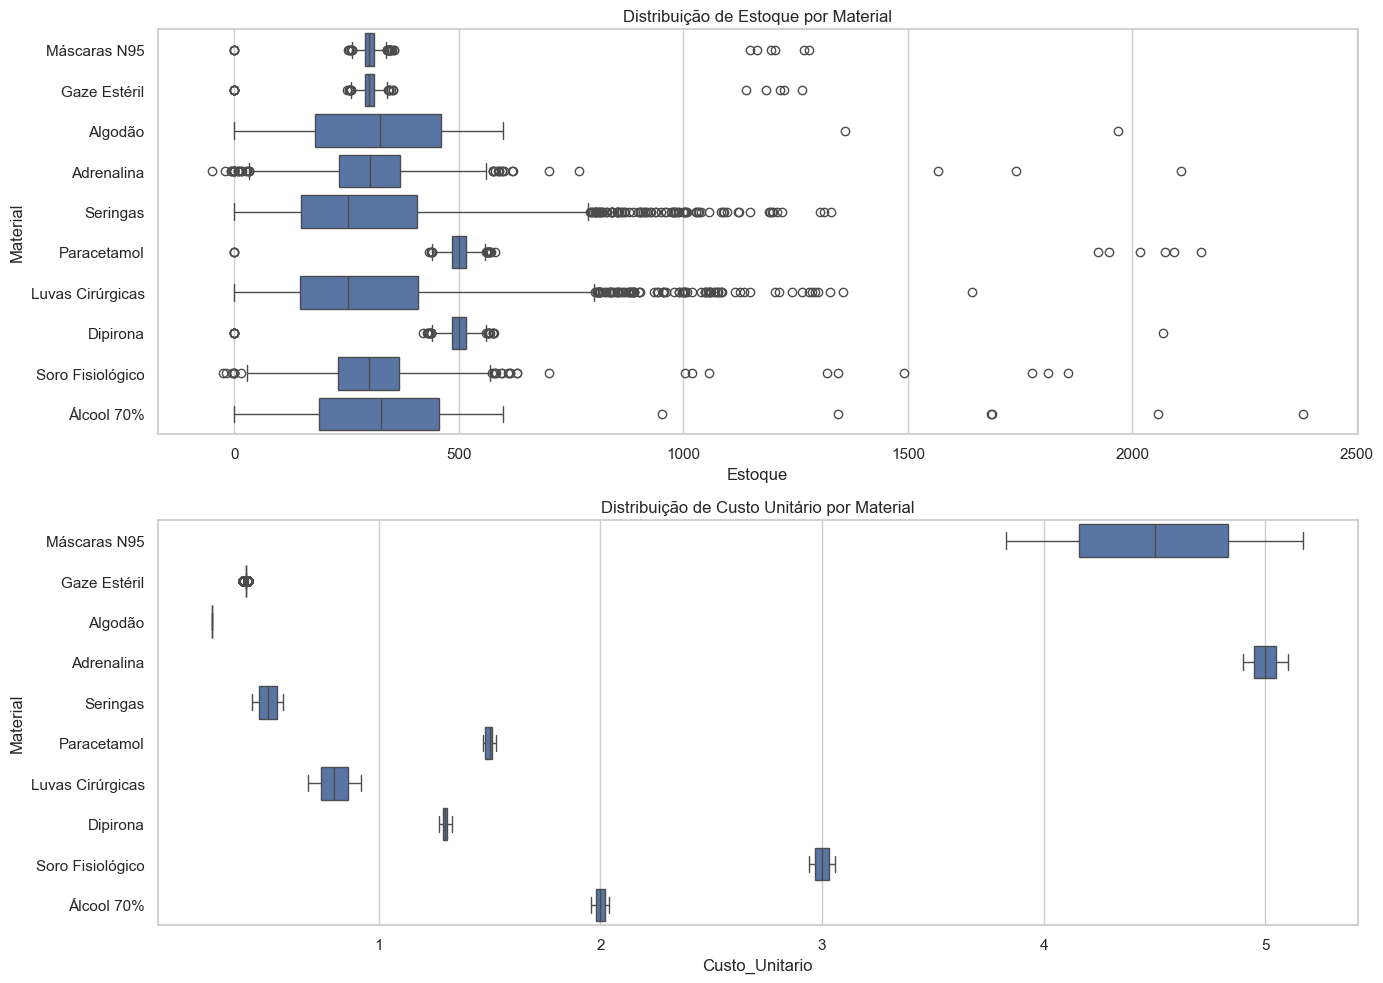

In [7]:

#Fun√ß√£o para detectar outliers via IQR
def detectar_outliers(grupo, coluna):
    Q1 = grupo[coluna].quantile(0.25)
    Q3 = grupo[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (grupo[coluna] < limite_inferior) | (grupo[coluna] > limite_superior)

#Criar colunas booleanas para outliers
dados['Outlier_Estoque'] = dados.groupby('Material', group_keys=False).apply(detectar_outliers, 'Estoque')
dados['Outlier_Custo'] = dados.groupby('Material', group_keys=False).apply(detectar_outliers, 'Custo_Unitario')


sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10), tight_layout=True)

# Estoque por Material
sns.boxplot(data=dados, x='Estoque', y='Material', ax=axes[0])
axes[0].set_title('Distribui√ß√£o de Estoque por Material')

# Custo Unit√°rio por Material
sns.boxplot(data=dados, x='Custo_Unitario', y='Material', ax=axes[1])
axes[1].set_title('Distribui√ß√£o de Custo Unit√°rio por Material')

plt.show()

In [8]:
# Filtrar registros com estoque negativo
estoque_negativo = dados[dados['Estoque'] < 0]

# Exibir resumo por material
resumo_negativo = (
    estoque_negativo.groupby('Material')
    .agg(Quantidade_Registros=('Estoque', 'count'),
         Estoque_M√≠nimo=('Estoque', 'min'),
         Estoque_M√©dio=('Estoque', 'mean'))
    .reset_index()
    .sort_values(by='Quantidade_Registros', ascending=False)
)

# Mostrar a tabela resumo
print(resumo_negativo)

           Material  Quantidade_Registros  Estoque_M√≠nimo  Estoque_M√©dio
0        Adrenalina                     5           -49.0          -17.8
1  Soro Fisiol√≥gico                     3           -26.0          -17.0


## An√°lise descritiva e gr√°ficos

### Verificar os 5 produtos mais usados 

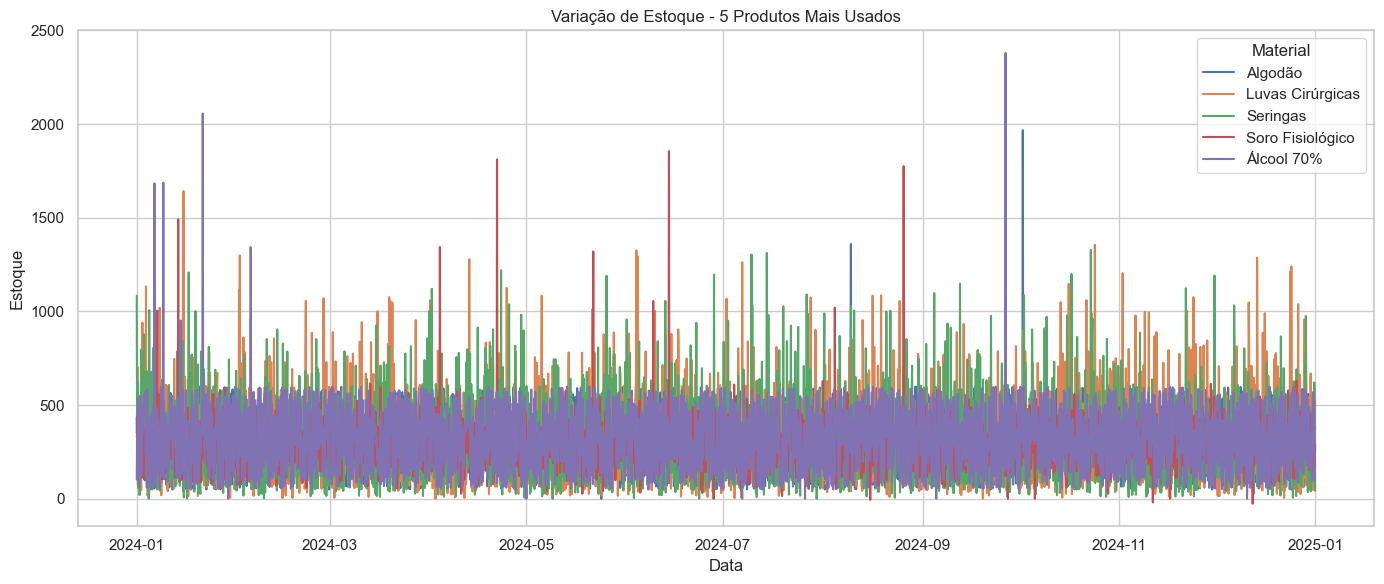

In [11]:
#1. Verificar os 5 produtos mais usados e a varia√ß√£o do estoque. 
# Garantir que a coluna DataHora esteja no formato datetime
dados['DataHora'] = pd.to_datetime(dados['DataHora'])

# Ordenar os dados para calcular varia√ß√£o por material e tempo
dados_ordenado = dados.sort_values(['Material', 'DataHora'])

# Calcular a diferen√ßa de estoque entre os registros consecutivos (varia√ß√£o)
dados_ordenado['Delta_Estoque'] = dados_ordenado.groupby('Material')['Estoque'].diff()

# Considerar apenas as redu√ß√µes de estoque (usos)
usos = dados_ordenado[dados_ordenado['Delta_Estoque'] < 0].copy()
usos['Consumo'] = usos['Delta_Estoque'].abs()  # valor positivo do consumo

# Somar o total de consumo por material
consumo_total = usos.groupby('Material')['Consumo'].sum().sort_values(ascending=False)

# Selecionar os 5 mais usados
top_5_usados = consumo_total.head(5).index.tolist()

# Filtrar dados para esses 5 materiais
dados_top5 = dados_ordenado[dados_ordenado['Material'].isin(top_5_usados)]

# Gr√°fico: Varia√ß√£o de estoque ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_top5, x='DataHora', y='Estoque', hue='Material')
plt.title('Varia√ß√£o de Estoque - 5 Produtos Mais Usados')
plt.xlabel('Data')
plt.ylabel('Estoque')
plt.legend(title='Material')
plt.tight_layout()
plt.show()


Esse gr√°fico exibe, ao longo do tempo, a varia√ß√£o no custo unit√°rio dos tr√™s produtos mais caros (em m√©dia) no ano.

üìä O que observar:

* Picos ou quedas repentinas podem indicar eventos como reabastecimento com fornecedores diferentes ou crises de suprimento.

* Uma linha est√°vel sugere controle de contratos ou pre√ßo fixado.

* Se os produtos forem, por exemplo, "Luvas Cir√∫rgicas", "M√°scaras N95" e "Adrenalina", espera-se que haja varia√ß√£o conforme alta demanda (ex: surtos de doen√ßas ou aumento de cirurgias).

üìå Interpreta√ß√£o:
Se os valores mostram alta volatilidade (muitas oscila√ß√µes), a Dasa pode estar sujeita a falta de padroniza√ß√£o de compra ou problemas de cadeia de suprimento.

### 5 produtos menos usados

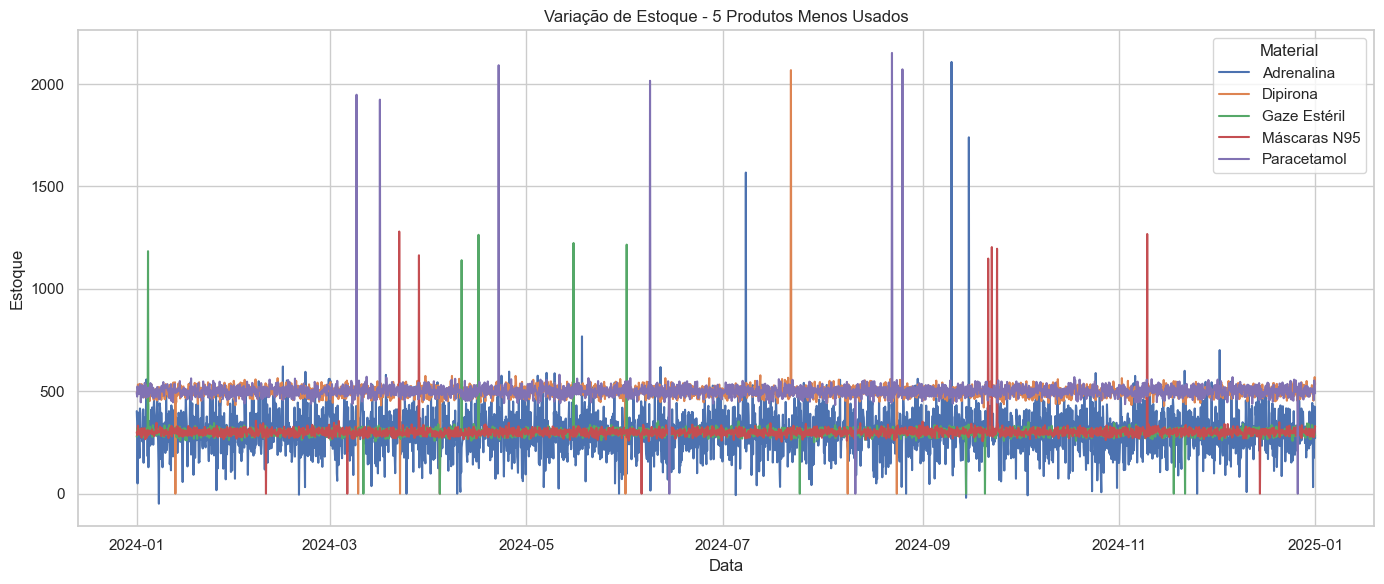

In [12]:
#2. Verificar os 5 produtos menos usados e a varia√ß√£o no estoque.
# Selecionar os 5 menos usados
bottom_5_usados = consumo_total.tail(5).index.tolist()

# Filtrar dados para esses 5 materiais
dados_bottom5 = dados_ordenado[dados_ordenado['Material'].isin(bottom_5_usados)]

# Gr√°fico: Varia√ß√£o de estoque ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_bottom5, x='DataHora', y='Estoque', hue='Material')
plt.title('Varia√ß√£o de Estoque - 5 Produtos Menos Usados')
plt.xlabel('Data')
plt.ylabel('Estoque')
plt.legend(title='Material')
plt.tight_layout()
plt.show()


Este gr√°fico exibe a varia√ß√£o di√°ria do estoque (Estoque) ao longo do tempo (Data) para cinco materiais (Adrenalina, Dipirona, Gaze Est√©ril, M√°scaras e Paracetamol)identificados como "Produtos Menos Usados", abrangendo o per√≠odo de janeiro de 2024 at√© o in√≠cio de 2025.

Eixo X (Data): Representa o tempo, cobrindo aproximadamente um ano, do in√≠cio de 2024 ao in√≠cio de 2025.
    
Eixo Y (Estoque): Representa o n√≠vel ou a quantidade de estoque do material.

Linhas (Material): Cada linha colorida representa um material espec√≠fico: Adrenalina (azul), Dipirona (laranja), Gaze Est√©ril (verde), M√°scaras N95 (vermelho) e Paracetamol (roxo).


üìä O que observar:

* Geralmente, esses materiais possuem custo mais est√°vel.

* Picos ou quedas podem indicar erros de registro ou promo√ß√µes/eventos sazonais de compra.

üìå Interpreta√ß√£o:


* N√≠veis Gerais de Estoque: A maioria dos produtos "menos usados", como Adrenalina, Gaze Est√©ril e M√°scaras N95, apresenta n√≠veis de estoque relativamente est√°veis e baixos, geralmente flutuando abaixo de 500 unidades.

* Picos Ocasional: Apesar de serem rotulados como "menos usados", alguns materiais, particularmente Paracetamol (roxo) e Dipirona (laranja), exibem picos significativos e acentuados de estoque em v√°rios pontos ao longo do ano. Esses picos podem atingir n√≠veis de 1500 a mais de 2000 unidades, indicando grandes e infrequentes recebimentos ou ajustes de estoque. Ap√≥s esses picos, os n√≠veis de estoque caem rapidamente, sugerindo consumo ou transfer√™ncia. Por√©m  essas varia√ß√£o inesperada nesses materiais de baixo custo, pode valer uma auditoria nos processos de entrada de dados ou nos contratos com fornecedores.

* Volatilidade: O gr√°fico destaca a alta volatilidade no estoque desses itens menos usados, impulsionada principalmente por eventos de reabastecimento grandes e infrequentes, em vez de uma taxa de uso consistente e elevada.
    
* Padr√£o de Uso: As r√°pidas quedas ap√≥s os picos sugerem que, mesmo que os produtos sejam "menos usados" diariamente, quando s√£o necess√°rios, podem ser consumidos relativamente r√°pido, ou grandes quantidades podem ser usadas para fins espec√≠ficos.

In [13]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inf) & (df[coluna] <= limite_sup)]

# Aplicar aos dados antes de gerar gr√°ficos
dados_sem_outliers = remover_outliers_iqr(dados, 'Custo_Unitario')



In [14]:
# Novo custo m√©dio sem outliers
custo_medio_sem_outliers = dados_sem_outliers.groupby('Material')['Custo_Unitario'].mean().sort_values()

# 3 menores e 3 maiores
bottom3_custo = custo_medio_sem_outliers.head(3).index.tolist()
top3_custo = custo_medio_sem_outliers.tail(3).index.tolist()

# Filtrar os dados
dados_top3 = dados_sem_outliers[dados_sem_outliers['Material'].isin(top3_custo)]
dados_bottom3 = dados_sem_outliers[dados_sem_outliers['Material'].isin(bottom3_custo)]


### 3 produtos com maior custo m√©dio

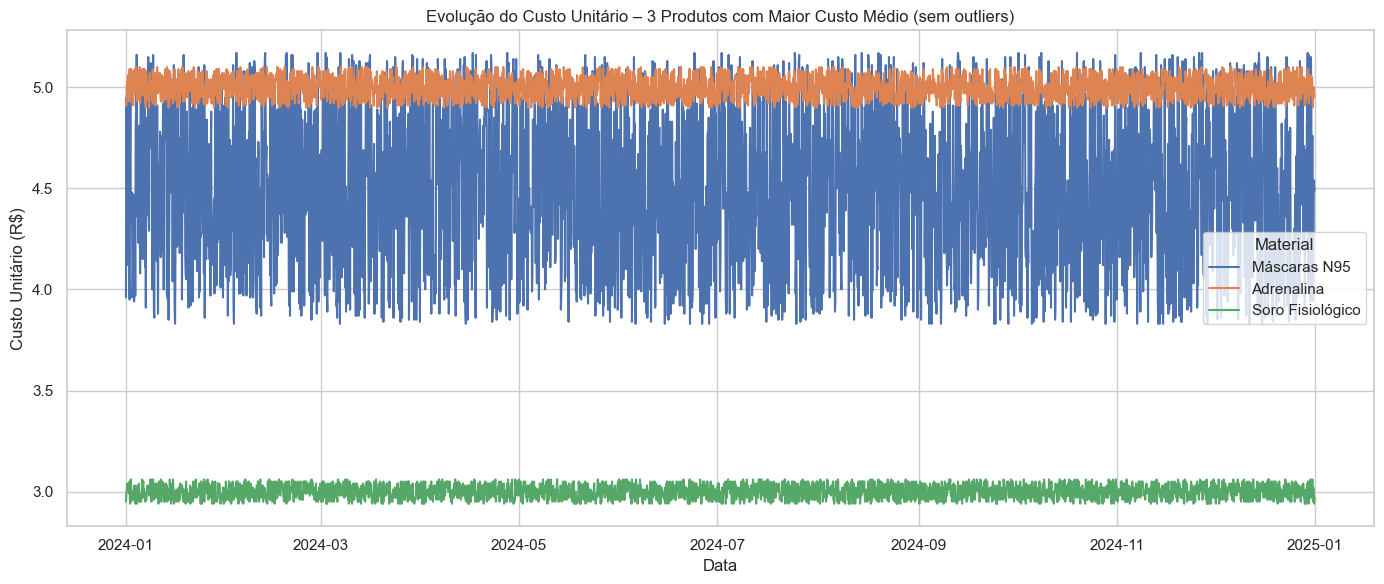

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_top3, x='DataHora', y='Custo_Unitario', hue='Material')
plt.title('Evolu√ß√£o do Custo Unit√°rio ‚Äì 3 Produtos com Maior Custo M√©dio (sem outliers)')
plt.xlabel('Data')
plt.ylabel('Custo Unit√°rio (R$)')
plt.tight_layout()
plt.show()


Este gr√°fico ilustra a evolu√ß√£o di√°ria do custo unit√°rio (Custo Unit√°rio (R$)) para tr√™s materiais identificados como tendo o "Maior Custo M√©dio", com a remo√ß√£o de outliers (valores at√≠picos), de janeiro de 2024 at√© o in√≠cio de 2025.

Eixo X (Data): Representa o tempo, do in√≠cio de 2024 ao in√≠cio de 2025.

Eixo Y (Custo Unit√°rio (R$)): Representa o custo unit√°rio do material em Reais (R$). A escala varia de aproximadamente R$3,0 a R$5,5.

Linhas (Material): Cada linha colorida representa um material espec√≠fico: M√°scaras N95 (azul), Adrenalina (laranja) e Soro Fisiol√≥gico (verde).

Comprimento dos ‚Äúbigodes‚Äù: reflete a dispers√£o de pre√ßos.

üìå Interpreta√ß√£o:

M√°scaras N95 e Adrenalina: Esses dois materiais mostram custos unit√°rios consistentemente mais altos, flutuando principalmente entre R$4,8 e R$5,2. Suas linhas de custo est√£o muito pr√≥ximas e se sobrep√µem em grande parte, indicando tend√™ncias de pre√ßos semelhantes. H√° uma pequena flutua√ß√£o di√°ria, mas, no geral, seus custos unit√°rios permanecem dentro de uma faixa estreita.

Soro Fisiol√≥gico: Este material tem um custo unit√°rio significativamente menor e muito mais est√°vel, mantendo-se um pouco acima de R$3,0. A linha √© notavelmente plana, sugerindo muito pouca varia√ß√£o em seu pre√ßo unit√°rio ao longo de todo o ano.
Estabilidade de Pre√ßos: Para esses itens de alto custo, os pre√ßos unit√°rios parecem relativamente est√°veis durante o per√≠odo observado, sem grandes aumentos ou diminui√ß√µes de pre√ßo.

Produtos com maior variabilidade podem estar sofrendo de:

* Falta de contratos de pre√ßo fixo

* Registros inconsistentes

* Compras emergenciais com custo maior

### 3 produtos com menor custo m√©dio

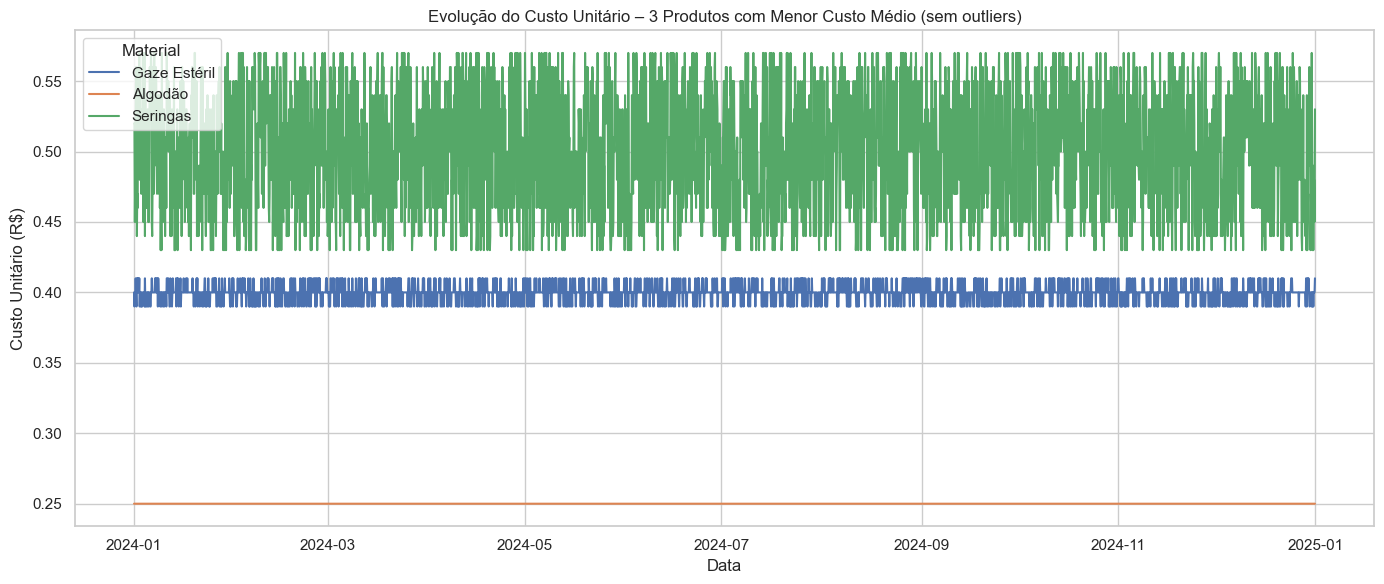

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_bottom3, x='DataHora', y='Custo_Unitario', hue='Material')
plt.title('Evolu√ß√£o do Custo Unit√°rio ‚Äì 3 Produtos com Menor Custo M√©dio (sem outliers)')
plt.xlabel('Data')
plt.ylabel('Custo Unit√°rio (R$)')
plt.tight_layout()
plt.show()


Este gr√°fico mostra a evolu√ß√£o di√°ria do custo unit√°rio (Custo Unit√°rio (R$)) para tr√™s materiais identificados como tendo o "Menor Custo M√©dio", com a remo√ß√£o de outliers (valores at√≠picos), de janeiro de 2024 at√© o in√≠cio de 2025.

Eixo X (Data): Representa o tempo, do in√≠cio de 2024 ao in√≠cio de 2025.

Eixo Y (Custo Unit√°rio (R$)): Representa o custo unit√°rio do material em Reais (R$). A escala varia de aproximadamente R$0,25 a R$0,55.

Linhas (Material): Cada linha colorida representa um material espec√≠fico: Gaze Est√©ril (azul), Algod√£o (laranja) e Seringas (verde).

üìä O que observar:

    Produtos no topo da tabela s√£o os que mais flutuam de pre√ßo.

    Valores baixos indicam pre√ßos controlados ou fixos.

üìå Interpreta√ß√£o:

* Gaze Est√©ril: O custo unit√°rio da Gaze Est√©ril √© consistentemente em torno de R$0,37, mostrando muito pouca varia√ß√£o di√°ria e uma linha notavelmente plana.
    
* Algod√£o: O custo unit√°rio do Algod√£o √© o menor entre os tr√™s, permanecendo perfeitamente est√°vel em R$0,25 ao longo de todo o ano. Isso sugere um pre√ßo fixo ou altamente previs√≠vel para este item.

* Custos Geralmente Baixos: Todos os tr√™s materiais permanecem consistentemente abaixo de R$0,60 por unidade, confirmando sua classifica√ß√£o como produtos de "menor custo m√©dio".

* Seringas: As Seringas apresentam a maior variabilidade entre os itens de baixo custo. Seu custo unit√°rio flutua significativamente, principalmente entre R$0,40 e R$0,55. A linha √© muito mais "ruidosa" em compara√ß√£o com Gaze Est√©ril e Algod√£o, indicando mudan√ßas de pre√ßo mais frequentes e percept√≠veis.

Itens com alta volatilidade devem ser analisados:

* Possuem alta sazonalidade?

* S√£o adquiridos por diferentes unidades com pol√≠ticas distintas?

* T√™m fornecedores inst√°veis?


    
    
    

### 5 produtos mais usados por m√™s

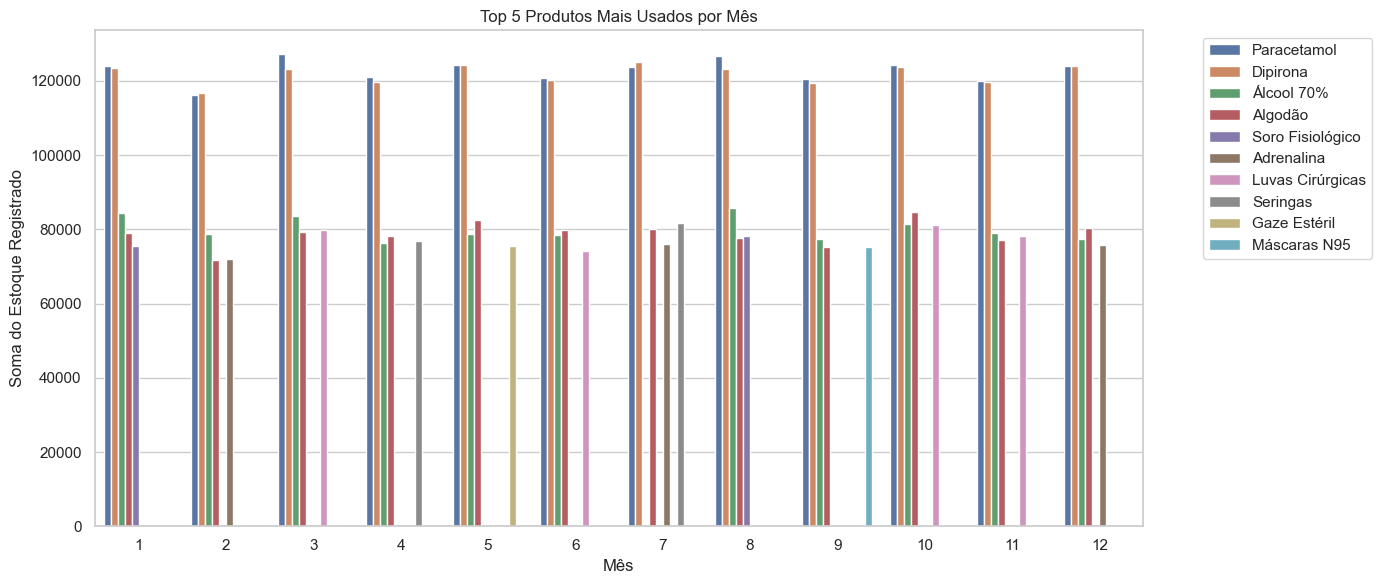

In [17]:
# Padronizar nomes de colunas
dados.columns = [col.strip().replace(" ", "_") for col in dados.columns]

# Converter DataHora
dados["DataHora"] = pd.to_datetime(dados["DataHora"])

# Filtrar dados v√°lidos (sem valores negativos)
dados = dados[(dados["Estoque"] >= 0) & (dados["Custo_Unitario"] >= 0)]

# Criar coluna de m√™s
dados["Mes"] = dados["DataHora"].dt.month

# Agrupar por m√™s e material
grupo_mes = dados.groupby(["Mes", "Material"])["Estoque"].sum().reset_index()

# Selecionar top 5 materiais por m√™s
top5_por_mes = grupo_mes.sort_values(["Mes", "Estoque"], ascending=[True, False]).groupby("Mes").head(5)

# Plotar gr√°fico
plt.figure(figsize=(14, 6))
sns.barplot(data=top5_por_mes, x="Mes", y="Estoque", hue="Material")
plt.title("Top 5 Produtos Mais Usados por M√™s")
plt.xlabel("M√™s")
plt.ylabel("Soma do Estoque Registrado")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Este gr√°fico apresenta os cinco materiais hospitalares mais utilizados em cada m√™s ao longo do ano de 2024. A an√°lise foi feita com base na soma dos estoques registrados por material em cada m√™s, assumindo que a quantidade estocada reflete o n√≠vel de uso e reposi√ß√£o do item.

Cada barra representa o total de estoque registrado para um material espec√≠fico em determinado m√™s, permitindo observar quais insumos s√£o mais consumidos em diferentes √©pocas do ano.

* Eixo X (M√™s): Representa os meses do ano, de 1 (janeiro) a 12 (dezembro).

* Eixo Y (Soma do Estoque Registrado): Representa o total de estoque registrado (provavelmente indicando o uso total ou consumo) para cada material em unidades, variando de 0 a mais de 120.000.

* Barras (Material): Cada cor dentro de um grupo mensal de barras representa um 
material diferente, conforme identificado na legenda.

üìå Interpreta√ß√£o:

* Varia√ß√µes sazonais foram identificadas: alguns materiais, como Soro Fisiol√≥gico e Paracetamol, tendem a ter picos de uso em meses espec√≠ficos ‚Äî possivelmente devido ao aumento de doen√ßas respirat√≥rias ou infec√ß√µes.

* Produtos como Luvas Cir√∫rgicas e M√°scaras N95 aparecem de forma constante entre os mais usados, indicando demanda est√°vel e cont√≠nua ao longo do ano, refletindo seu uso em procedimentos de rotina e medidas de prote√ß√£o.

* Esses padr√µes podem ajudar no planejamento log√≠stico, antecipando a necessidade de reabastecimento em per√≠odos cr√≠ticos.

### 5 produtos mais usados por per√≠odo de 3 horas

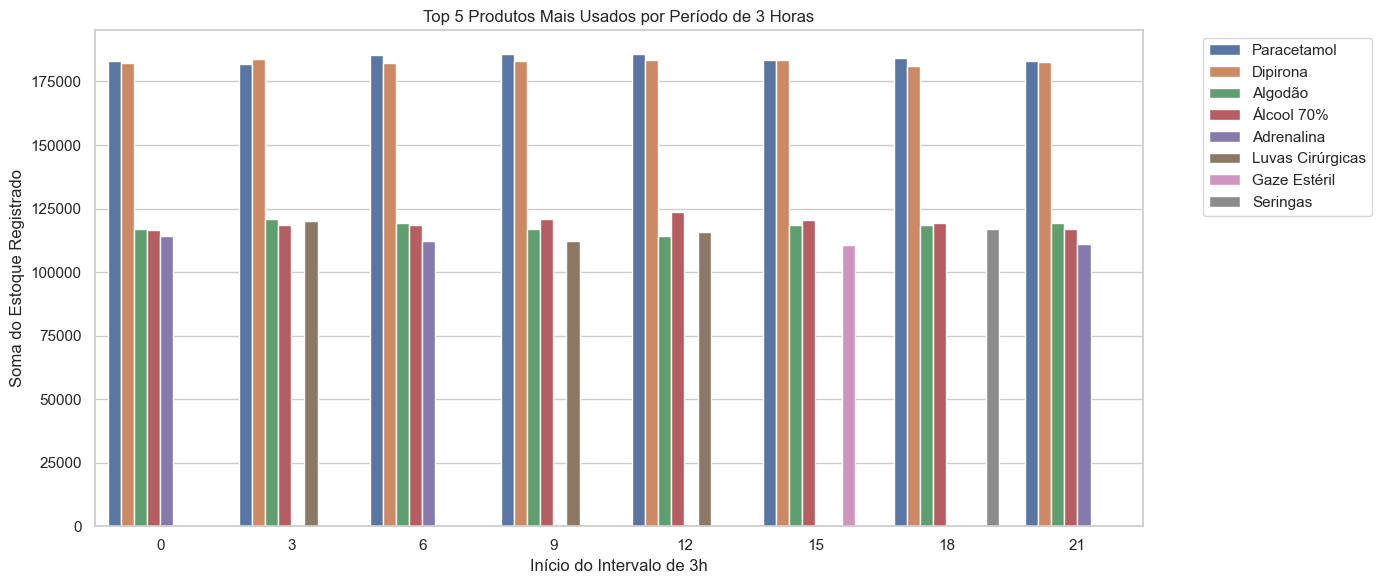

In [18]:
# Criar coluna com intervalo de 3 horas
dados["Periodo_3h"] = dados["DataHora"].dt.hour // 3 * 3

# Agrupar por faixa de 3h e material
grupo_3h = dados.groupby(["Periodo_3h", "Material"])["Estoque"].sum().reset_index()

# Selecionar top 5 por faixa de hor√°rio
top5_por_3h = grupo_3h.sort_values(["Periodo_3h", "Estoque"], ascending=[True, False]).groupby("Periodo_3h").head(5)

# Plotar gr√°fico
plt.figure(figsize=(14, 6))
sns.barplot(data=top5_por_3h, x="Periodo_3h", y="Estoque", hue="Material")
plt.title("Top 5 Produtos Mais Usados por Per√≠odo de 3 Horas")
plt.xlabel("In√≠cio do Intervalo de 3h")
plt.ylabel("Soma do Estoque Registrado")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Este gr√°fico mostra os cinco materiais com maior uso para cada faixa de 3 horas ao longo do dia. As faixas s√£o: 0h‚Äì3h, 3h‚Äì6h, ..., 21h‚Äì24h. O objetivo √© identificar padr√µes de consumo intra-di√°rios, ou seja, quais materiais s√£o mais requisitados em determinados turnos.


Eixo X (In√≠cio do Intervalo de 3h): Representa a hora de in√≠cio do intervalo de 3 horas (0, 3, 6, 9, 12, 15, 18, 21). Isso cobre um ciclo completo de 24 horas.

Eixo Y (Soma do Estoque Registrado): Representa o total de estoque registrado (uso/consumo) para cada material em unidades, variando de 0 a mais de 175.000.

Barras (Material): Cada cor dentro de um grupo de barras de intervalo de 3 horas representa um material diferente, conforme identificado na legenda.


üìå Interpreta√ß√£o:

* Observa-se que materiais como Adrenalina, Luvas Cir√∫rgicas e Seringas apresentam maior uso nas faixas de hor√°rio diurnas, especialmente entre 6h e 18h, que correspondem ao hor√°rio de maior volume de procedimentos.

* Produtos como Paracetamol e Dipirona t√™m uma presen√ßa mais distribu√≠da ao longo do dia, indicando uso cont√≠nuo, provavelmente relacionado √† administra√ß√£o de medicamentos em pacientes internados.

* Essa an√°lise √© √∫til para otimizar a distribui√ß√£o de insumos por turno, garantindo que os materiais certos estejam dispon√≠veis nos hor√°rios de maior demanda. 